___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [4]:
df2 = pd.read_csv(r'C:\Users\ABC\Desktop\Yazilim\Deep Learning\Assignment-3\Frozen_Dessert_Production.csv', 
                index_col='DATE',
                parse_dates=True  
                )

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [5]:
df= df2.copy()

In [6]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.columns

Index(['IPN31152N'], dtype='object')

<AxesSubplot:xlabel='DATE'>

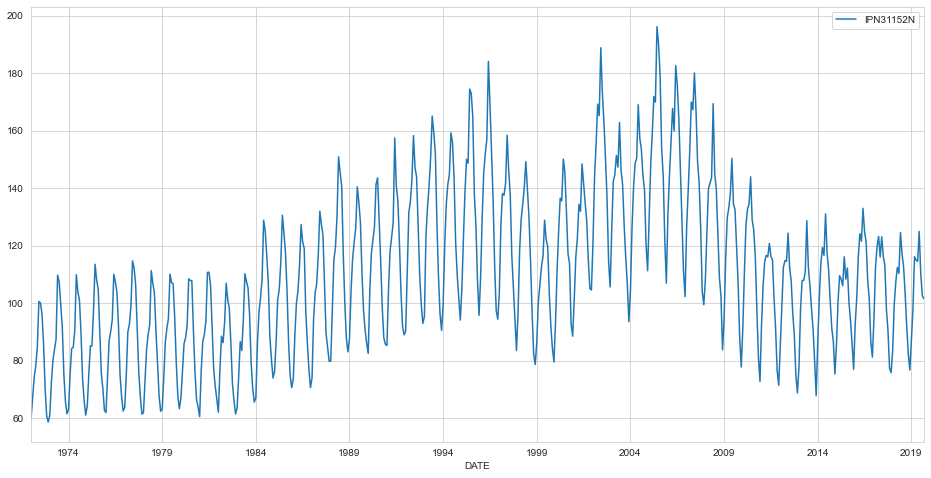

In [10]:
df.plot(figsize=(16,8))

In [11]:
len(df)

573

# Preprocessing of Data

## Train Test Split

In [12]:
test_size = 70

In [13]:
test_ind = len(df)- test_size
test_ind

503

In [14]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [15]:
train

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2013-07-01,112.369
2013-08-01,106.055
2013-09-01,98.191


In [16]:
df.columns = ['Target']

## Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
length = 12 
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [22]:
len(generator)

491

In [23]:
len(generator)

491

In [24]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ]]]),
 array([[0.01774221]]))

In [25]:
X, y = generator[0]

In [26]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.        ]
Predict this y: 
 [[0.01774221]]


# Modelling & Model Performance

## with "tanh" activation function

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [28]:
train_scaled.shape

(503, 1)

In [29]:
n_features = train_scaled.shape[1]

In [30]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features))) ##return_sequence
model.add(LSTM(50, activation = 'tanh'))                                        #eger daha arkasindan bir layer daha  
                                                                                #gelecekse kullanilir.LSTM gelecekse
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [32]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))##lstm  sonucu hesaplama. Lstm katmanlari .

40800

In [33]:
4 * ((100+1)*50+(50**2))

30200

In [34]:
from tensorflow.keras.callbacks import EarlyStopping


In [35]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 4,restore_best_weights = True)

In [36]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [37]:
len(validation_generator)

58

In [38]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
491/491 [==============================] - 11s 12ms/step - loss: 0.0256 - val_loss: 0.0037
Epoch 2/120
491/491 [==============================] - 5s 10ms/step - loss: 0.0057 - val_loss: 0.0031
Epoch 3/120
491/491 [==============================] - 5s 10ms/step - loss: 0.0051 - val_loss: 0.0042
Epoch 4/120
491/491 [==============================] - 5s 10ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 5/120
491/491 [==============================] - 5s 11ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 6/120
491/491 [==============================] - 8s 17ms/step - loss: 0.0039 - val_loss: 0.0027
Epoch 7/120
491/491 [==============================] - 8s 17ms/step - loss: 0.0034 - val_loss: 0.0022
Epoch 8/120
491/491 [==============================] - 8s 17ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 9/120
491/491 [==============================] - 9s 18ms/step - loss: 0.0037 - val_loss: 0.0022
Epoch 10/120
491/491 [==============================] - 8s 17ms/step - loss: 0.00

<AxesSubplot:>

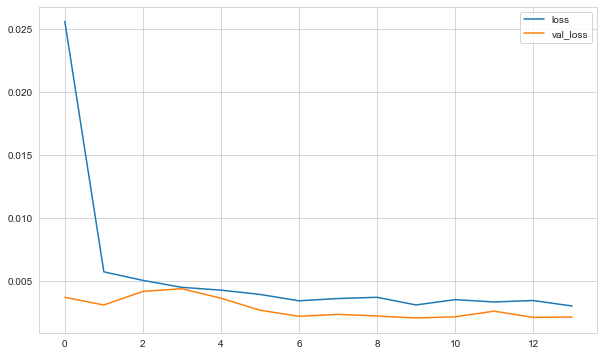

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [42]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 22ms/step


In [43]:
predictions_scaled

[array([0.14505213], dtype=float32),
 array([0.18901148], dtype=float32),
 array([0.2573659], dtype=float32),
 array([0.32463548], dtype=float32),
 array([0.38046187], dtype=float32),
 array([0.42005315], dtype=float32),
 array([0.43441743], dtype=float32),
 array([0.40671307], dtype=float32),
 array([0.34755796], dtype=float32),
 array([0.26367095], dtype=float32),
 array([0.18057558], dtype=float32),
 array([0.12982187], dtype=float32)]

In [44]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.7905868355387309 
mae: 0.050361020924869694 
mse: 0.0032801411759531564 
rmse: 0.05727251675937732


### Inverse Transformation and Comparing

In [81]:
predictions = scaler.inverse_transform(predictions_scaled)

In [82]:
compare = test[:12]

In [83]:
compare

,IPN31152N
DATE,
2013-12-01,67.803
2014-01-01,86.397
2014-02-01,101.731
2014-03-01,113.776
2014-04-01,119.353
2014-05-01,116.631
2014-06-01,131.040
2014-07-01,117.272
2014-08-01,111.418


<AxesSubplot:xlabel='DATE'>

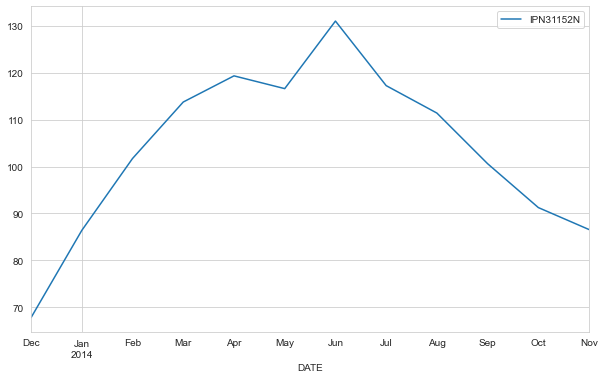

In [84]:
compare.plot()

In [85]:
compare['IPN31152N'] = predictions

## with "relu" activation function

In [89]:
model2 = Sequential()
model2.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features))) 
model2.add(LSTM(50, activation = 'relu'))                                         
                                                                                
model2.add(Dense(1))
model2.compile(optimizer = 'adam', loss = 'mse')

In [90]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [91]:
model2.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
491/491 [==============================] - 7s 10ms/step - loss: 0.0281 - val_loss: 0.0065
Epoch 2/120
491/491 [==============================] - 5s 9ms/step - loss: 0.0175 - val_loss: 0.0045
Epoch 3/120
491/491 [==============================] - 4s 9ms/step - loss: 0.0067 - val_loss: 0.0053
Epoch 4/120
491/491 [==============================] - 5s 10ms/step - loss: 0.0060 - val_loss: 0.0039
Epoch 5/120
491/491 [==============================] - 4s 9ms/step - loss: 0.0060 - val_loss: 0.0026
Epoch 6/120
491/491 [==============================] - 5s 9ms/step - loss: 0.0054 - val_loss: 0.0028
Epoch 7/120
491/491 [==============================] - 6s 13ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 8/120
491/491 [==============================] - 8s 16ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 9/120
491/491 [==============================] - 8s 16ms/step - loss: 0.0041 - val_loss: 0.0024
Epoch 10/120
491/491 [==============================] - 8s 16ms/step - loss: 0.0037 - 

<AxesSubplot:>

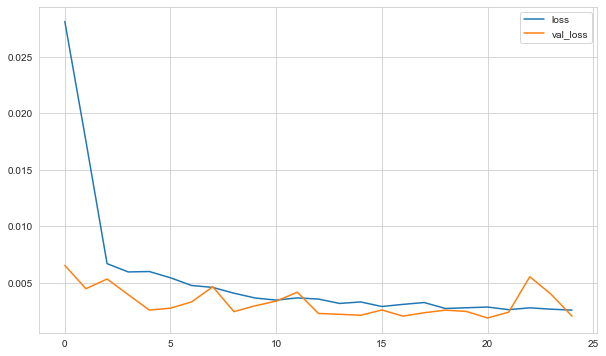

In [92]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot()

### Evaluation on Test Data

In [93]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model2.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 [==============================] - 0s 20ms/step


In [94]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.750727657600177 
mae: 0.058388280185285725 
mse: 0.0039044750430824848 
rmse: 0.0624857987312516


### Inverse Transformation and Comparing

In [95]:
predictions2 = scaler.inverse_transform(predictions_scaled)

In [96]:
compare2 = test[:12]
compare2

,IPN31152N
DATE,
2013-12-01,67.803
2014-01-01,86.397
2014-02-01,101.731
2014-03-01,113.776
2014-04-01,119.353
2014-05-01,116.631
2014-06-01,131.040
2014-07-01,117.272
2014-08-01,111.418


<AxesSubplot:xlabel='DATE'>

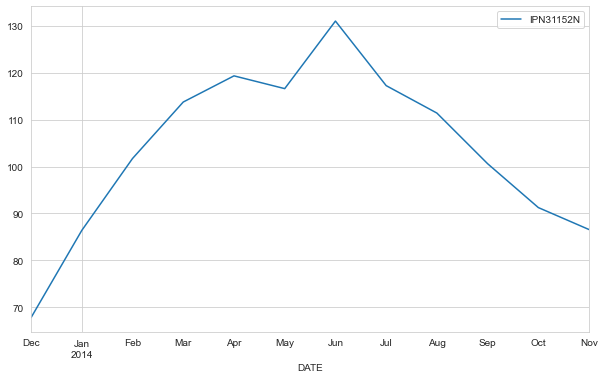

In [97]:
compare2.plot()

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [98]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [99]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [100]:
len(df)

573

In [101]:
len(generator)

561

In [102]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 22ms/step


In [103]:
forecast = scaler.inverse_transform(forecast)

In [104]:
forecast

array([[ 86.58422512],
       [ 81.35745891],
       [ 82.89639685],
       [ 90.11278374],
       [ 99.30716259],
       [107.94991509],
       [114.20613913],
       [117.81830582],
       [117.69983818],
       [112.16602616],
       [102.94520962],
       [ 91.85592027]])

In [105]:
df

,Target
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [ ]:
# Simdi de Target oldu.. (??)
# Forecast olarakdegistiriyorum..

In [106]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')

In [107]:
forecast

array([[ 86.58422512],
       [ 81.35745891],
       [ 82.89639685],
       [ 90.11278374],
       [ 99.30716259],
       [107.94991509],
       [114.20613913],
       [117.81830582],
       [117.69983818],
       [112.16602616],
       [102.94520962],
       [ 91.85592027]])

In [108]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [109]:
forecast_df

,Forecast
2019-10-01,86.584
2019-11-01,81.357
2019-12-01,82.896
2020-01-01,90.113
2020-02-01,99.307
2020-03-01,107.950
2020-04-01,114.206
2020-05-01,117.818
2020-06-01,117.700
2020-07-01,112.166


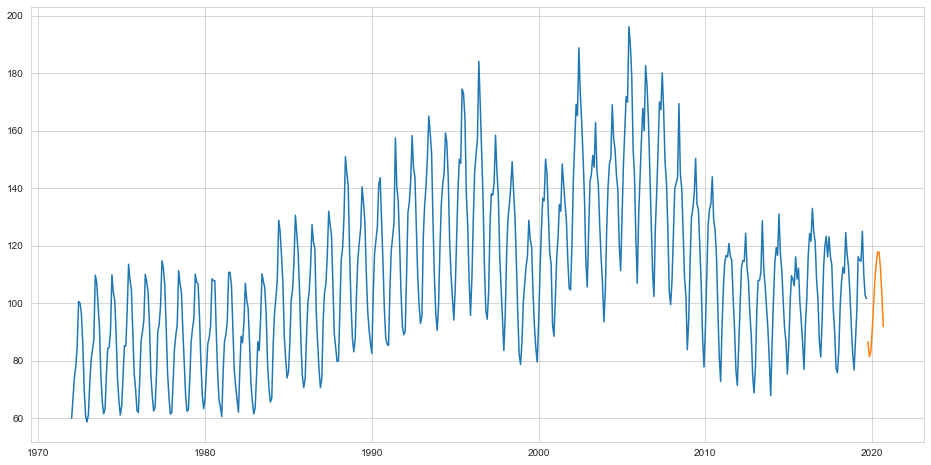

In [111]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Target'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

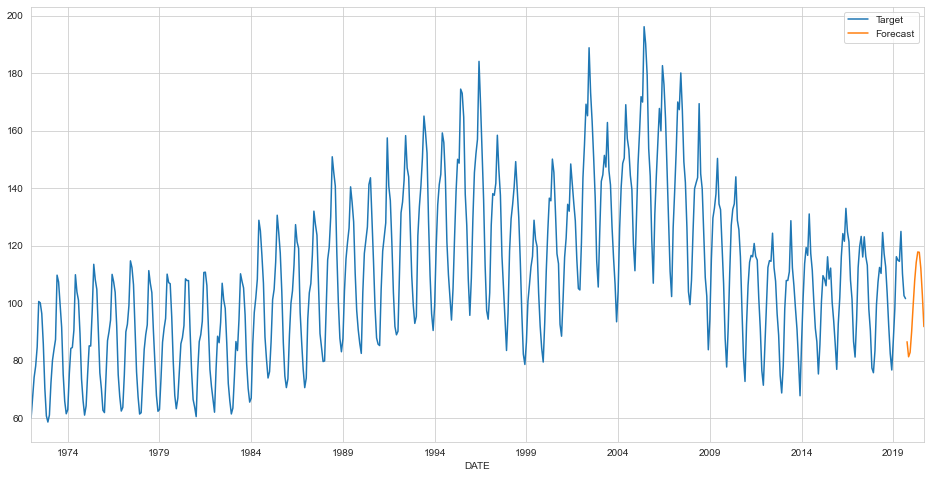

In [112]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

(576.0, 611.0)

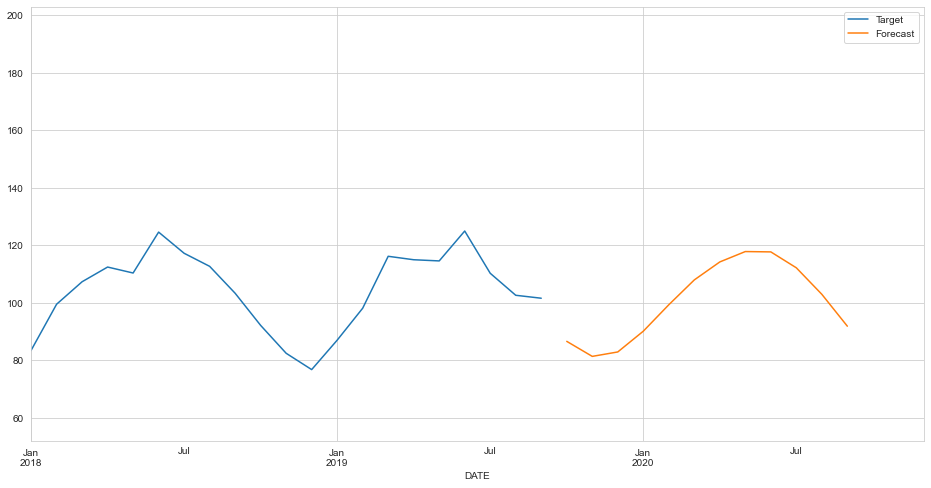

In [113]:
ax = df.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2020-12-01')

In [114]:
dataset_total = pd.concat((df['Target'], forecast_df['Forecast']), axis=0)#datamiz ile predict datamizi birlestirdik.

<AxesSubplot:>

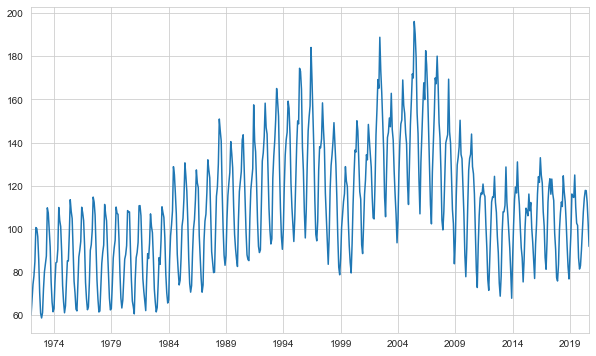

In [115]:
dataset_total.plot()

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___